# Неделя 4
## Задание 1
### Бэггинг и случайный лес


Загрузка массива цифр

In [59]:
from sklearn import ensemble, cross_validation, learning_curve, metrics 
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import pandas as pd

In [3]:
import sklearn.datasets as ds
data = ds.load_digits()

In [16]:
data.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

Создание массива параметров и вектора отчетов.

In [26]:
X = data.values()[1]
y = data.values()[4]
print X.shape
print y.shape

(1797L, 64L)
(1797L,)


    1. обучение Decision Tree

In [67]:
DT = DecisionTreeClassifier()
score = cross_validation.cross_val_score(DT,X, y=y, cv=10)
print score.mean()

0.831441399535


In [63]:
def write_answer_1(score):
    with open("random_forest_1.txt", "w") as fout:
        fout.write(str(score))
write_answer_1(score.mean())        
    

    2. Сравнение с лесом
    

In [76]:
DT = DecisionTreeClassifier()
Bag = ensemble.BaggingClassifier(base_estimator=DT, n_estimators=100) #100 trees
score = cross_validation.cross_val_score(Bag,X, y=y, cv=10)
print score.mean()

0.927714305715


In [77]:
def write_answer_2(score):
    with open("random_forest_2.txt", "w") as fout:
        fout.write(str(score))
write_answer_2(score.mean())     

    3. Обучение на случайном подпространстве 

In [83]:
DT = DecisionTreeClassifier()
Bag = ensemble.BaggingClassifier(base_estimator=DT,max_features=np.sqrt(X.shape[1])/X.shape[1],n_estimators=100) #100 trees
score = cross_validation.cross_val_score(Bag,X, y=y, cv=10)
print score.mean()




0.936119303953


In [81]:
def write_answer_3(score):
    with open("random_forest_3.txt", "w") as fout:
        fout.write(str(score))
write_answer_3(score.mean())    

    4. Выбор случайного подпространства на каждой вершине дерева 

In [84]:
DT = DecisionTreeClassifier(max_features=np.sqrt(X.shape[1])/X.shape[1])
Bag = ensemble.BaggingClassifier(base_estimator=DT,n_estimators=100) #100 trees
score = cross_validation.cross_val_score(Bag,X, y=y, cv=10)
print score.mean()

0.949436258025


In [85]:
def write_answer_4(score):
    with open("random_forest_4.txt", "w") as fout:
        fout.write(str(score))
write_answer_4(score.mean())    

    5. Обучение леса с разными параметрами 

In [90]:
score = []
for i in range(100):
    rf_classifier = ensemble.RandomForestClassifier(n_estimators = i+1, max_depth = 10, random_state = 1)
    score_ar = cross_validation.cross_val_score(rf_classifier,X, y=y, cv=10)
    score.append((score_ar.mean(),i))

In [88]:
from matplotlib import pyplot
%matplotlib inline

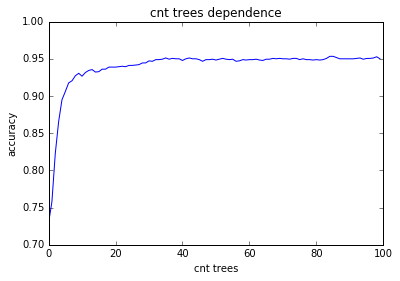

In [96]:
pyplot.plot(map(lambda x: x[1], score), map(lambda x: x[0], score))
pyplot.title('cnt trees dependence')
pyplot.xlabel('cnt trees')
pyplot.ylabel('accuracy')

In [100]:
score = []
for i in range(20):
    rf_classifier = ensemble.RandomForestClassifier(n_estimators = 84, max_depth = i+1, random_state = 1)
    score_ar = cross_validation.cross_val_score(rf_classifier,X, y=y, cv=10)
    score.append((score_ar.mean(),i))

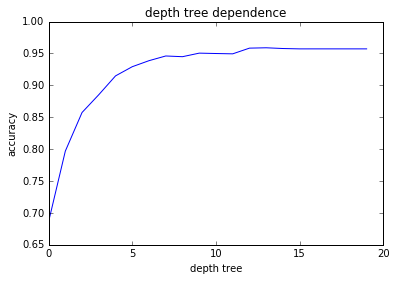

In [101]:
pyplot.plot(map(lambda x: x[1], score), map(lambda x: x[0], score))
pyplot.title('depth tree dependence')
pyplot.xlabel('depth tree')
pyplot.ylabel('accuracy')

In [105]:
score = []
for i in range(64):
    rf_classifier = ensemble.RandomForestClassifier(n_estimators = 84, max_features= i+1 ,max_depth = i+1, random_state = 1)
    score_ar = cross_validation.cross_val_score(rf_classifier,X, y=y, cv=10)
    score.append((score_ar.mean(),i))

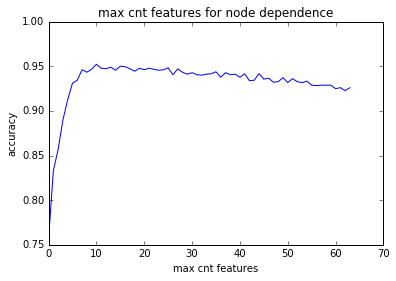

In [106]:
pyplot.plot(map(lambda x: x[1], score), map(lambda x: x[0], score))
pyplot.title('max cnt features for node dependence')
pyplot.xlabel('max cnt features')
pyplot.ylabel('accuracy')